In [24]:
import numpy as np
import numpy.random as rd
import pandas as pd

import copy, sys
from collections import Counter

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import animation as ani
import seaborn as sns
sns.set(style="whitegrid", palette="muted", color_codes=True)

## 今回対象とする分布

In [25]:

# 確率関数から正規化定数を除いたもの
def P(x1, x2, b):
    assert np.abs(b) < 1
    return np.exp(-0.5*(x1**2 - 2*b*x1*x2 + x2**2))


## アニメーションで150個のサンプリングを可視化する

norm
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151


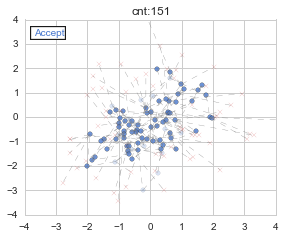

In [50]:
# parameters
b = 0.5
delta = 1
dist_type = "norm" # "norm" # "unif"

# result
sample = []

#initial state
current = (1, 1)
sample.append(current)

print dist_type

num_frame = 150.
cnt = 0
def animate(nframe):
    global current, cnt
    cnt += 1
    print cnt, 

    # candidate of next step
    if dist_type == "norm":
        next = (current[0] + rd.normal(0, delta), current[1] + rd.normal(0, delta))
    else:
        next = (current[0] + rd.uniform(-delta, delta), current[1] + rd.uniform(-delta, delta))

    P_prev = P(current[0], current[1], b)
    P_next = P(next[0], next[1], b)

    r = P_next/P_prev

    ax = fig.add_subplot(111)
    
    rect = plt.Rectangle((-3.8,3.2), 1.1, .5,fc="#ffffff", zorder=cnt)
    ax.add_patch(rect)
    
    plt.plot([current[0], next[0]], [current[1], next[1]], "k--", lw=.3, color="gray") 
    
    if r > 1 or r > rd.uniform(0, 1):
        # 0-1の一様乱数がrより大きい時は状態を更新する。 
        current = copy.copy(next)
        if nframe > num_frame*.2:
            alpha = 0.8
        else:
            # イテレーション回数の20%はBurn-in期間と考える(プロットの色を薄くして示す）
            alpha = 0.2
        plt.scatter(current[0], current[1], alpha=alpha)
        plt.text(-3.7, 3.35, "Accept", zorder=cnt, fontdict={'color':"b"})
    else:  
        # 0-1の一様乱数がrより小さい時は棄却する。 
        plt.scatter(next[0], next[1], alpha=0.5, color="r", marker="x")
        plt.text(-3.7, 3.35, "Reject", zorder=cnt, fontdict={'color':"r"})

    sample.append(current) 
    plt.xlim(-4, 4)
    plt.ylim(-4, 4)
    
    if nframe > num_frame*.2:
        plt.title("cnt:{}".format(cnt))
    else:
        plt.title("cnt:{} [burn-in]".format(cnt))


fig = plt.figure(figsize=(4.5,3.5))
anim = ani.FuncAnimation(fig, animate, frames=int(num_frame), blit=True)
anim.save('metropolis_norm.gif', writer='imagemagick', fps=3, dpi=64)

## 10,000個のサンプリング実行

norm


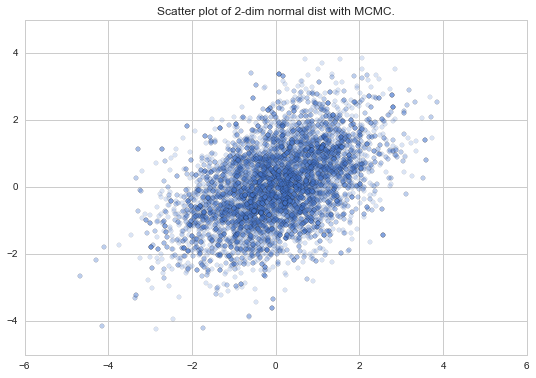

In [79]:
# parameters
b = 0.5
delta = 1
dist_type = "norm" # "norm" # "unif"

# result
sample = []

#initial state
current = (5, 5)
sample.append(current)

print dist_type

for i in range(10000):

    # candidate of next step
    if dist_type == "norm":
        next = (current[0] + rd.normal(0, delta), current[1] + rd.normal(0, delta))
    else:
        next = (current[0] + rd.uniform(-delta, delta), current[1] + rd.uniform(-delta, delta))

    P_prev = P(current[0], current[1], b)
    P_next = P(next[0], next[1], b)

    r = P_next/P_prev

    if r > 1 or r > rd.uniform(0, 1):
        # 0-1の一様乱数がrより大きい時は状態を更新する。 
        current = copy.copy(next)

    sample.append(current)    
sample = np.array(sample)
plt.figure(figsize=(9,6))
plt.scatter(sample[int(len(sample)*0.2):,0], sample[int(len(sample)*0.2):,1], alpha=0.2)
plt.title("Scatter plot of 2-dim normal dist with MCMC.")
plt.show()

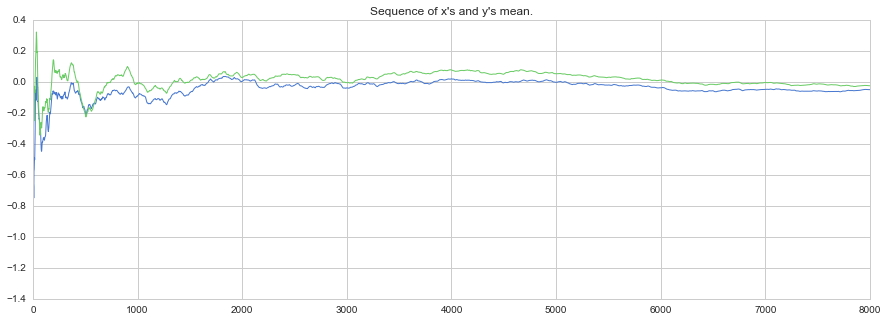

In [78]:
ave = [[],[]]

start = len(sample) * 0.2
for i, d in enumerate(np.array(sample[int(start):])):
    #print d
    if i == 0:
        ave[0].append(float(d[0]))
        ave[1].append(float(d[1]))
    else:
        ave[0].append( (ave[0][i-1]*i + d[0])/float(i+1) )
        ave[1].append( (ave[1][i-1]*i + d[1])/float(i+1) )


plt.figure(figsize=(15, 5))
plt.xlim(0, len(sample[int(start):]))
plt.plot(np.array(ave).T, lw=1)
plt.title("Sequence of x's and y's mean.")
plt.show()